# Código de preparación de datos...

Este pequeño código prepara los datos para ser manipulados. Los datos provienen de la salida de muones para la localidad de Bucaramanga despues del resultado de una simulación en Corsika. La idea es manipular el primero de los archivos para obtener la energía total a partir de la consideración de los momentos en las direcciones $x$, $y$, y $z$. Lo segundo es teniendo la energía vamos a organizar los datos de tal manera de calcular el flujo diferencial, es decir, sumar todos los muones que llegan en la misma dirección para tener el número de muones que entran por esa determinada dirección, con esto tendremos una data de flujo por dirección.

In [1]:
import numpy as np
import math
import pandas as pd
from scipy.stats import itemfreq
import matplotlib.pyplot as plt
ff_int=lambda x: "%i" % x
#ff_dec=lambda x: "%.1f" % x
np.set_printoptions(formatter={'float_kind':ff_int})
!ls

distp1_machin.out		   salidaEab_prueba60.txt
flux_buca_filter.ipynb		   salidaEab_prueba70.txt
flux_filter_machinp1.ipynb	   salidaEab_prueba80.txt
muones_buca_1h.out		   salidaEab_prueba90.txt
muonesBucara.out		   salidaGauss_prueba100.txt
muones_to_propagate.out		   salidaGauss_prueba30.txt
muones_to_propagate_prueba100.out  salidaGauss_prueba40.txt
muones_to_propagate_prueba30.out   salidaGauss_prueba50.txt
muones_to_propagate_prueba40.out   salidaGauss_prueba60.txt
muones_to_propagate_prueba50.out   salidaGauss_prueba70.txt
muones_to_propagate_prueba60.out   salidaGauss_prueba80.txt
muones_to_propagate_prueba70.out   salidaGauss_prueba90.txt
muones_to_propagate_prueba80.out   totalrealMachin.out
muones_to_propagate_prueba90.out   totalrealMachin_tpcount_ordenados.out
MuonStoppingPower2.txt		   totalrealMachin_tpdE_ordenados.out
salidaEab_prueba100.txt		   totalrealMachin_tpE_ordenados.out
salidaEab_prueba30.txt		   tpE_muones_buca.out
salidaEab_prueba40.txt		   tracking_Eab.py
sali

In [2]:
data=np.loadtxt('muones_buca_1h.out',delimiter=' ')
px,py,pz=data[:,0],data[:,1],data[:,2]
p=np.sqrt(px**2+py**2+pz**2)
m_rest=0.1057 #unit: GeV/c**2 #masa en reposo del muon
E=np.round(np.sqrt(p**2+m_rest**2)) # Energía a partir de la masa en reposo del muon
theta=np.round(np.degrees(np.arccos(pz/p)),decimals=0) # Calcula en angulo cenith
at2=np.arctan2(py,px)
phi=np.round(np.degrees((2*np.pi+at2)*(at2<0)+(at2)*(at2>0)),decimals=0) # Calcula el angulo azimuth

In [3]:
#def count(a):
#    results = {}
#    for x in a:
#        if x not in results:
#            results[x] = 1
#        else:
#            results[x] += 1
#    return results
data=np.c_[theta,phi,E]
data=data[data[:,0].argsort()]
#print data
E1=data[(data[:,0]>=0) & (data[:,0]<=30)][:,2]
E2=data[(data[:,0]<=50) & (data[:,0]>=40)][:,2]
E3=data[(data[:,0]<=70) & (data[:,0]>=60)][:,2]
E4=data[(data[:,0]<=90) & (data[:,0]>=80)][:,2]
F1,F2,F3,F4=np.unique(E1),np.unique(E2),np.unique(E3),np.unique(E4)
N1,N2,N3,N4,N5=[],[],[],[],[]
for i in F1:
    N1.append(np.sum(E1==i))
for i in F2:
    N2.append(np.sum(E2==i))
for i in F3:
    N3.append(np.sum(E3==i))
for i in F4:
    N4.append(np.sum(E4==i))
N1,N2,N3,N4=np.array(N1),np.array(N2),np.array(N3),np.array(N4)
print len(E1), len(F1), len(N1)

298139 248 248


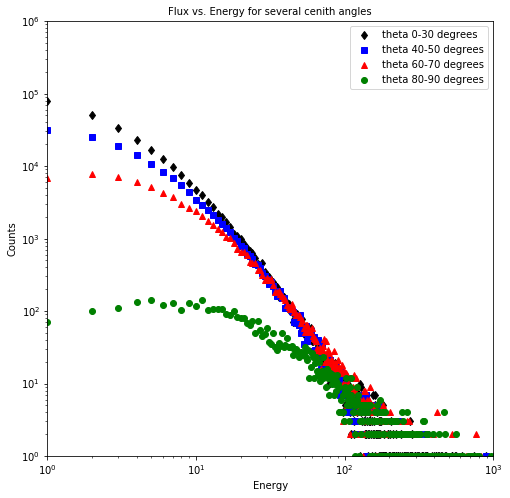

In [4]:
plt.figure(figsize=(8,8))
plt.loglog(F1,N1,color='black',marker='d',linestyle='None',label='theta 0-30 degrees',lw=1.5)
plt.loglog(F2,N2,color='blue',marker='s',linestyle='None',label='theta 40-50 degrees',lw=1.5)
plt.loglog(F3,N3,color='red',marker='^',linestyle='None',label='theta 60-70 degrees',lw=1.5)
plt.loglog(F4,N4,color='green',marker='o',linestyle='None',label='theta 80-90 degrees',lw=1.5)
plt.axis([0, 1E3, 0, 1E6])
plt.xlabel('Energy', fontsize='medium')
plt.ylabel('Counts', fontsize='medium')
plt.legend(loc='upper right', fontsize='medium')
plt.title("Flux vs. Energy for several cenith angles", fontsize='medium')
plt.show()

In [5]:
df1=pd.read_csv('muones_buca_1h.out',sep=' ',names=['px','py','pz','p'])
df1.head(5)

,px,py,pz,p
0,-9.999940,-10.950000,6.280580,16
1,-0.010000,-0.061516,0.138746,0
2,-0.999976,1.534230,1.104500,2
3,-0.099998,-2.011070,2.949910,4
4,-0.099997,0.022856,1.062450,1


In [6]:
px,py,pz=df1['px'],df1['py'],df1['pz']
pt=np.sqrt(px**2+py**2+pz**2)
m_rest=0.1057 #unit: GeV/c**2
Et=np.sqrt(pt**2+m_rest**2)
thetat=np.degrees(np.arccos(pz/pt))
at2=np.arctan2(py,px)
phit=np.degrees((2*np.pi+at2)*(at2<0)+(at2)*(at2>0))

In [7]:
data_var=np.c_[thetat,phit,Et]
data=np.savetxt('tpE_muones_buca.out',data_var,delimiter=' ',fmt='%i %i %2f')
df2=pd.read_csv('tpE_muones_buca.out',sep=' ',names=['theta','phi','E'])

In [8]:
df2.groupby(['theta','E']).count()

phi
theta E              
0     0.186963      1
      0.214867      1
      0.214904      1
      0.225077      1
      0.232456      1
      0.234714      1
      0.245743      1
      0.269926      1
      0.281981      1
      0.329320      1
      0.331042      1
      0.335854      1
      0.338126      1
      0.338367      1
      0.343355      1
      0.345654      1
      0.373313      1
      0.385431      1
      0.389255      1
      0.391892      1
      0.398119      1
      0.398285      1
      0.403344      1
      0.408527      1
      0.415450      1
      0.422749      1
      0.432085      1
      0.442734      1
      0.444917      1
      0.445442      1
...               ...
88    89.895279     1
      90.284964     1
      111.654270    1
      113.814139    1
      123.820299    1
      146.743673    1
      170.435544    1
      172.480328    1
      212.612906    1
      244.365436    1
      245.610134    1
      377.808791    1
      398.958971    1
      428.533643    1
      514.023603    1
      682.486569    1
      697.612091    1
      742.712583    1
89    9.464962      1
      38.336962     1
      44.937336     1
      54.960935     1
      69.299757     1
      77.070293     1
      100.029447    1
      101.512185    1
      125.792857    1
      181.018545    1
      402.862093    1
      596.956048    1

[806500 rows x 1 columns]